In [1]:
import torch
from torch import nn
from torchvision.models import resnet101

### 添加数据集cifar

In [7]:
import torchvision
import os

# if the process of load failed, use the code below
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


root_path = os.path.join("../../dataset")
train_dataset = torchvision.datasets.CIFAR10(root=root_path, train=True, download=True, transform=None)
test_dataset = torchvision.datasets.CIFAR10(root=root_path, train=False, download=True, transform=None)

100%|██████████| 170498071/170498071 [00:13<00:00, 12736563.15it/s]


Extracting ../../dataset/cifar-10-python.tar.gz to ../../dataset
Files already downloaded and verified


查看加载的图像

(32, 32, 3)


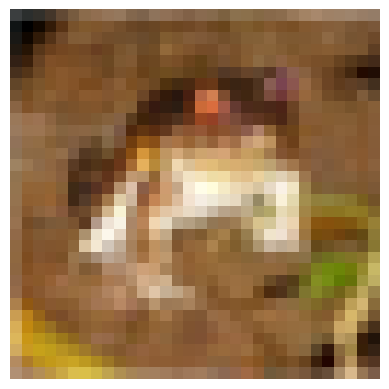

(32, 32, 3)


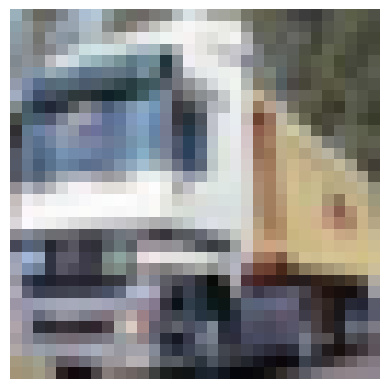

(32, 32, 3)


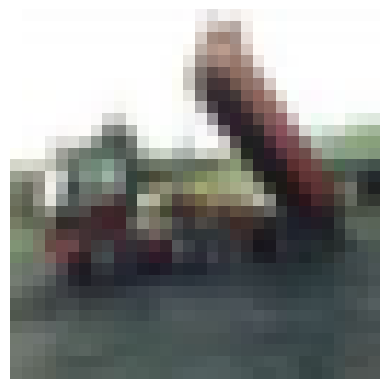

In [13]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
num_pictures = 3
for i in range(num_pictures):
    img, label = train_dataset.__getitem__(i)
    # print(type(img)) # the image is pil image
    # print(label)  # the label is a int
    print(np.array(img).shape)
    plt.imshow(img)
    plt.axis('off')  # 关闭坐标轴
    plt.show()

加载预训练模型; 先查看网络结构

In [45]:
from torchvision.models import resnet18
resnet = resnet18(pretrained=True)
# the method children returns a generator containing all the layers, and use list mothods
print(resnet.children())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/lintiansheng/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 12.5MB/s]


<generator object Module.children at 0x7fe9601dbeb0>


In [46]:
import torch.nn as nn
num_features_in = resnet.fc.in_features
cifar_10_class = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
resnet.fc = nn.Linear(num_features_in, len(cifar_10_class))

resnet_forward_features = nn.Sequential(*list(resnet.children())[:-2])
fc_weights = resnet.state_dict()['fc.weight'].numpy()
resnet.eval()
resnet_forward_features.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [48]:
img, label = train_dataset.__getitem__(0)
img_tensor = torch.tensor(np.array(img), dtype=torch.float)
img_tensor = torch.transpose(img_tensor, 2, 0).contiguous()
img_tensor = img_tensor.unsqueeze(dim=0)
print(img_tensor)
print(img_tensor.shape)

tensor([[[[ 59.,  16.,  25.,  ..., 208., 180., 177.],
          [ 43.,   0.,  16.,  ..., 201., 173., 168.],
          [ 50.,  18.,  49.,  ..., 198., 186., 179.],
          ...,
          [158., 123., 118.,  ..., 160., 184., 216.],
          [152., 119., 120.,  ...,  56.,  97., 151.],
          [148., 122., 109.,  ...,  53.,  83., 123.]],

         [[ 62.,  20.,  24.,  ..., 170., 139., 144.],
          [ 46.,   0.,   7.,  ..., 153., 123., 129.],
          [ 48.,   8.,  27.,  ..., 161., 144., 142.],
          ...,
          [132.,  88.,  84.,  ..., 133., 148., 184.],
          [125.,  83.,  84.,  ...,  31.,  62., 118.],
          [124.,  87.,  73.,  ...,  34.,  53.,  92.]],

         [[ 63.,  20.,  21.,  ...,  96.,  96., 116.],
          [ 45.,   0.,   0.,  ...,  34.,  42.,  94.],
          [ 43.,   0.,   8.,  ...,  26.,  30.,  87.],
          ...,
          [108.,  55.,  50.,  ...,  70.,  94., 140.],
          [102.,  50.,  50.,  ...,   7.,  34.,  84.],
          [103.,  57.,  42.,  ...

In [57]:
img_features = resnet_forward_features(img_tensor)
print(img_features.shape)
logits = resnet(img_tensor)
logits = nn.Softmax(dim=1)(logits).data.squeeze()
print(logits)

torch.Size([1, 512, 1, 1])
tensor([5.8666e-11, 4.0247e-13, 2.6622e-14, 5.8674e-12, 1.8745e-17, 3.0357e-20,
        2.7105e-14, 1.0000e+00, 5.7193e-12, 4.0362e-13])


In [58]:
probs, idx = logits.sort(0, True)
print(probs)
print(idx)

tensor([1.0000e+00, 5.8666e-11, 5.8674e-12, 5.7193e-12, 4.0362e-13, 4.0247e-13,
        2.7105e-14, 2.6622e-14, 1.8745e-17, 3.0357e-20])
tensor([7, 0, 3, 8, 9, 1, 6, 2, 4, 5])


In [59]:
def returnCAM(feature_conv, weight_softmax, class_idx):
    b, c, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam =weight_softmax[idx].dot(feature_conv.reshape((c, h*w)))
        cam = cam.reshape((h, w))
        cam_img = (cam - cam.min()) / (cam.max() - cam.min())
        cam_img = np.array(255 * cam_img).astype(np.uint8)
        output_cam.append(cam_img)
    return output_cam

In [60]:
img_features = img_features.detach().numpy()
CAMs = returnCAM(img_features, fc_weights, [idx[0]])

/var/folders/3x/cttyv8yj0b32_gvcpjqry6hw0000gn/T/ipykernel_48794/3725325102.py:7: RuntimeWarning: invalid value encountered in divide
  cam_img = (cam - cam.min()) / (cam.max() - cam.min())
/var/folders/3x/cttyv8yj0b32_gvcpjqry6hw0000gn/T/ipykernel_48794/3725325102.py:8: RuntimeWarning: invalid value encountered in cast
  cam_img = np.array(255 * cam_img).astype(np.uint8)
